# Pareto front plot

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Read trials results 
These are stored in `vanilla.csv`

In [7]:
results_dir = 'results_week3_SH_515/' # set results directory
df = pd.read_csv("../"+results_dir+"vanilla.csv")

In [8]:
df

,number,values_0,values_1,values_2,datetime_start,datetime_complete,duration,params_learning_rate,params_model_name,params_norm,params_train_batch_size,params_training_loss,params_weight_decay,state
0,0,1.014249,0.946606,0.920221,2023-05-15 15:28:25.969522,2023-05-15 15:44:26.908798,0 days 00:16:00.939276,0.000724,deeplabv3+,minmax,72,logcosh,3.563373e-04,COMPLETE
1,1,1.031492,1.291467,1.168341,2023-05-15 15:28:26.073629,2023-05-15 15:41:50.659509,0 days 00:13:24.585880,0.000729,fpn,minmax,69,xtanh,8.820187e-10,COMPLETE
2,2,26.944480,12056.517145,162.335371,2023-05-15 15:41:50.809684,2023-05-15 15:49:25.752140,0 days 00:07:34.942456,0.004404,deeplabv3,None,93,mse,9.686252e-07,COMPLETE
3,3,1.154232,3.684489,2.090224,2023-05-15 15:44:27.026468,2023-05-15 15:55:39.479356,0 days 00:11:12.452888,0.000201,fpn,zscore,17,mse,3.457871e-04,COMPLETE
4,4,1.210385,6.647368,3.194059,2023-05-15 15:49:25.847049,2023-05-15 16:27:58.827759,0 days 00:38:32.980710,0.000002,deeplabv3,negone,28,xsigmoid,4.886768e-04,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,155,0.958051,0.370431,0.665752,2023-05-16 05:55:19.166366,2023-05-16 06:10:58.791764,0 days 00:15:39.625398,0.000464,manet,minmax,6,mae,1.621078e-04,COMPLETE
156,156,1.053467,1.415000,1.253607,2023-05-16 05:57:34.424083,2023-05-16 06:10:17.474016,0 days 00:12:43.049933,0.000005,manet,minmax,12,mae,5.347170e-11,COMPLETE
157,157,0.957344,0.347130,0.634832,2023-05-16 06:10:17.576845,2023-05-16 06:21:05.605800,0 days 00:10:48.028955,0.001377,manet,minmax,7,mae,9.566906e-04,COMPLETE
158,158,0.958357,0.355408,0.640138,2023-05-16 06:10:58.901430,2023-05-16 06:25:10.038705,0 days 00:14:11.137275,0.001347,manet,minmax,14,mae,2.045340e-08,COMPLETE


## Plot individual metric values

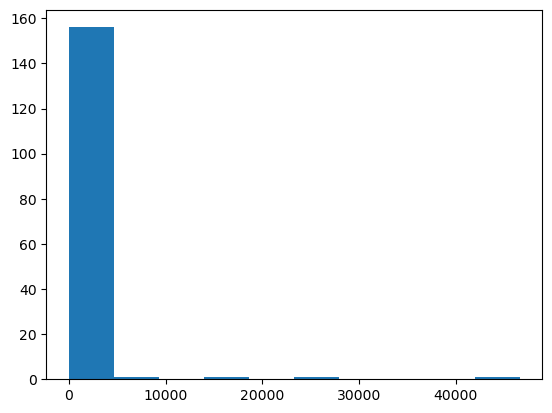

In [13]:
plt.hist(df.values_0);

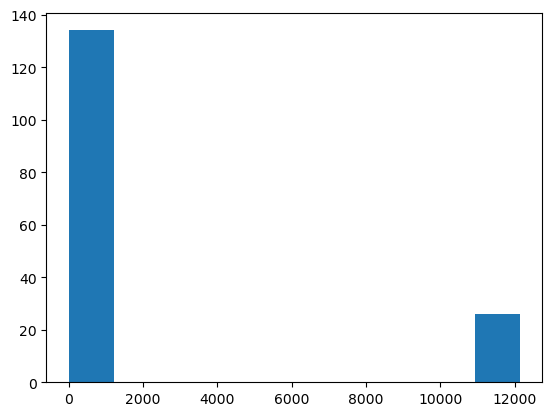

In [15]:
plt.hist(df.values_1);

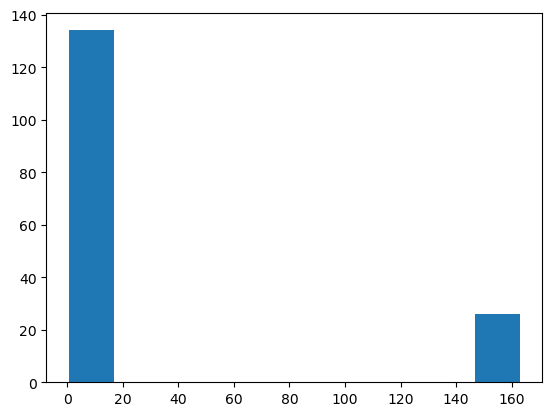

In [16]:
plt.hist(df.values_2);

## Plot 2 metrics

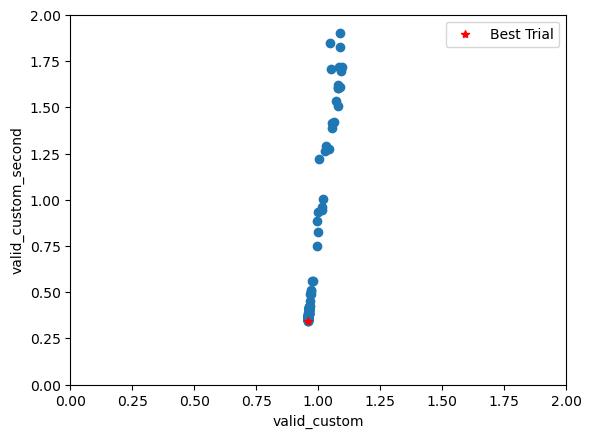

In [52]:
plt.scatter(df.values_0, df.values_1)

plt.plot(min(df.values_0), min(df.values_1), 'r*', label='Best Trial')

maxval=2
plt.xlim(0,maxval)
plt.ylim(0,maxval)

plt.xlabel('valid_custom')
plt.ylabel('valid_custom_second')

plt.legend();

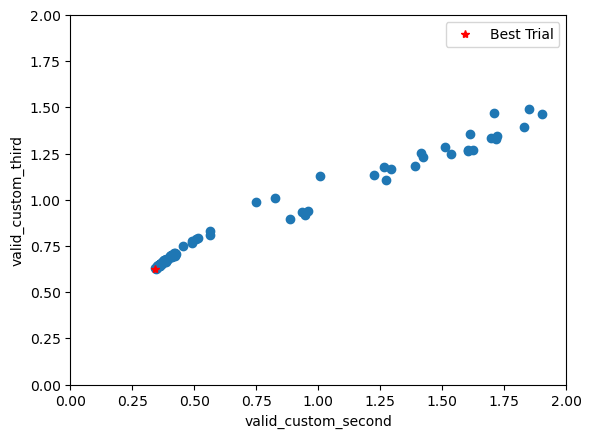

In [53]:
plt.scatter(df.values_1, df.values_2)

plt.plot(min(df.values_1), min(df.values_2), 'r*', label='Best Trial')

maxval=2
plt.xlim(0,maxval)
plt.ylim(0,maxval)

plt.xlabel('valid_custom_second')
plt.ylabel('valid_custom_third')

plt.legend();

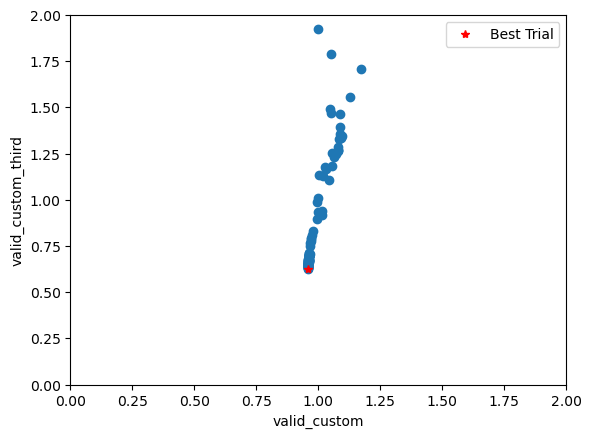

In [54]:
plt.scatter(df.values_0, df.values_2)

plt.plot(min(df.values_0), min(df.values_2), 'r*', label='Best Trial')

maxval=2
plt.xlim(0,maxval)
plt.ylim(0,maxval)

plt.xlabel('valid_custom')
plt.ylabel('valid_custom_third')

plt.legend();

## 3D Scatter

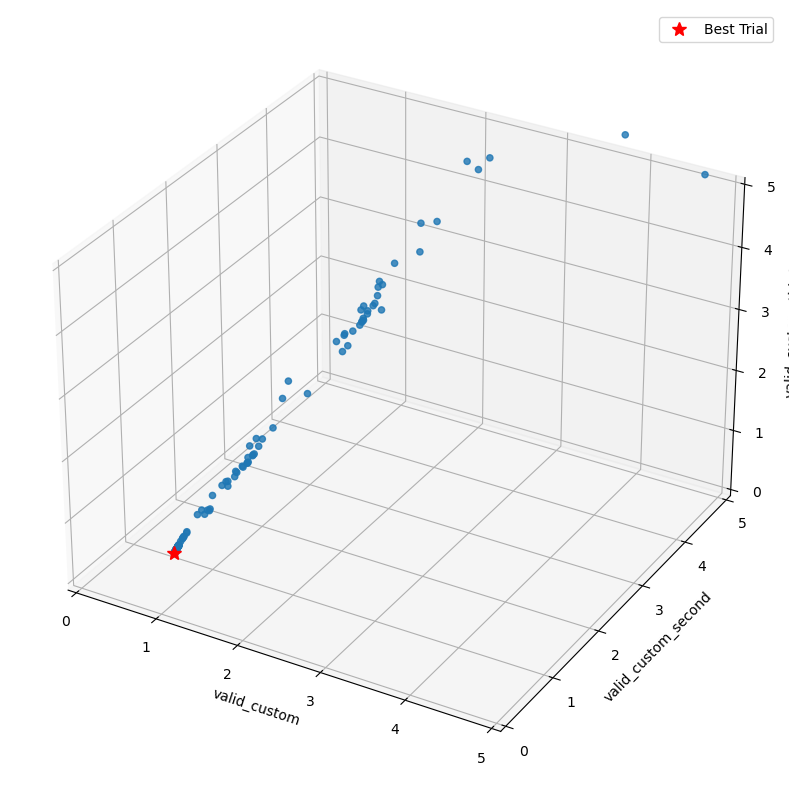

In [67]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

# set bounds
maxval=5
ax.set_xlim3d(None,maxval)
ax.set_ylim3d(None,maxval)
ax.set_zlim3d(None,maxval)

# axis labels
ax.set_xlabel('valid_custom')
ax.set_ylabel('valid_custom_second')
ax.set_zlabel('valid_custom_third')

ax.scatter(df.values_0, df.values_1, df.values_2)

ax.plot(min(df.values_0), min(df.values_1), min(df.values_2), 'r*', markersize=10, label='Best Trial', zorder=10);

plt.legend();

plt.savefig('../'+results_dir+'pareto_front_zoom.png', bbox_inches='tight', pad_inches=0.5);

## TO DO: look into [PyVista](https://docs.pyvista.org/version/stable/)